For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()
Plot all the categorical variables with the proper plot. What can you see?
There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
Plot time variable. Can you extract something from it?

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
     

In [3]:
customer_df  = pd.read_csv(r"C:\Users\estel\Documents\Ironhack\labs\lab-cleaning-numerical-data\we_fn_use_c_marketing_customer_value_analysis.csv")

In [4]:

categoricals = customer_df.select_dtypes('object')

In [5]:
categoricals.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
categoricals = categoricals.drop(['Customer','Effective To Date'], axis=1)

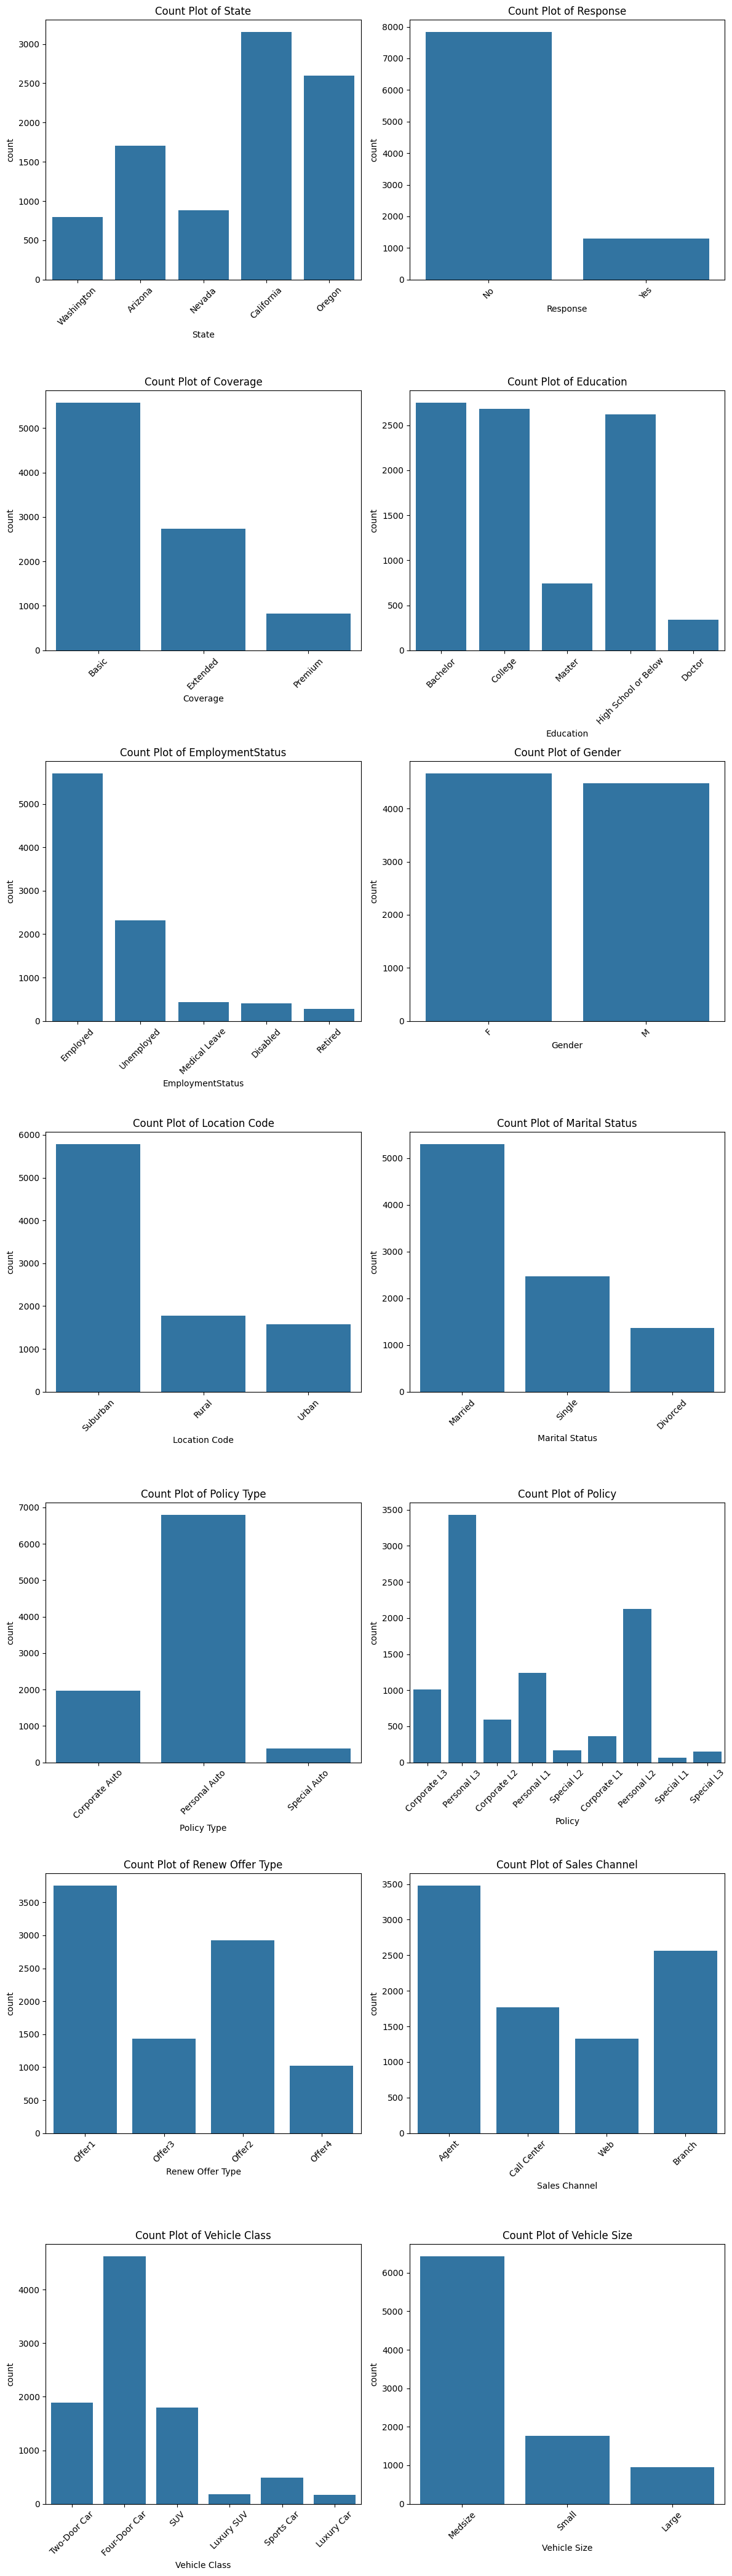

In [7]:


num_cols = len(categoricals.columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, num_rows * 6))

for i, col in enumerate(categoricals.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(x=col, data=categoricals)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [9]:
categoricals = customer_df.select_dtypes('object')
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'], format='%m/%d/%y')

categoricals['Year-Month'] = categoricals['Effective To Date'].dt.strftime('%b %Y')

In [10]:

categoricals['Year-Month'].value_counts()

Year-Month
Jan 2011    4898
Feb 2011    4236
Name: count, dtype: int64

In [11]:

categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'], format='%m/%d/%y')
categoricals['Year'] = categoricals['Effective To Date'].dt.year
categoricals['Month'] = categoricals['Effective To Date'].dt.month_name()
categoricals['Day of Week'] = categoricals['Effective To Date'].dt.day_name()


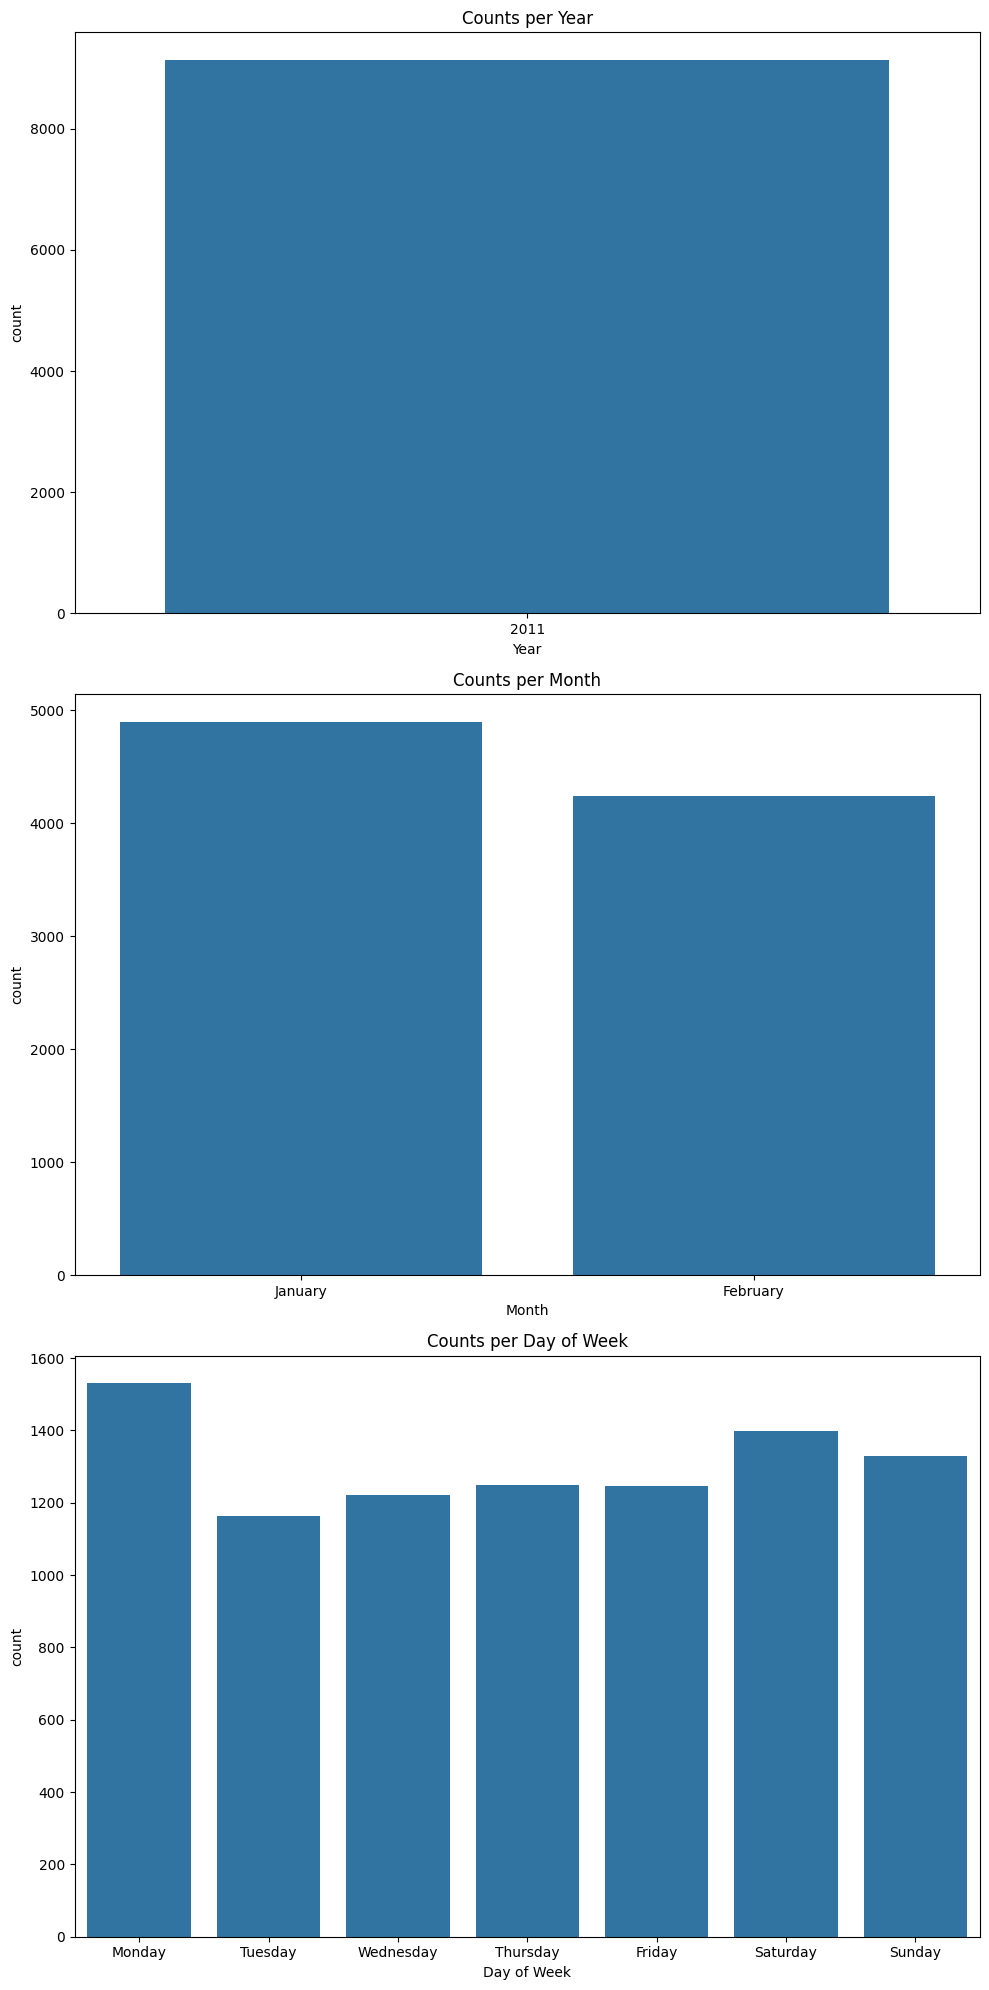

In [12]:

fig, ax = plt.subplots(3, 1, figsize=(10, 20))


sns.countplot(data=categoricals, x='Year', ax=ax[0])
ax[0].set_title('Counts per Year')

sns.countplot(data=categoricals, x='Month', ax=ax[1], order = categoricals['Month'].value_counts().index)
ax[1].set_title('Counts per Month')

sns.countplot(data=categoricals, x='Day of Week', ax=ax[2], order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[2].set_title('Counts per Day of Week')

plt.tight_layout()
plt.show()